# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Preflight 7: Simulating charged particles in fields (10 points total)

## Preflight Summary
- Practice writing functions: fields and equations of motion
- Review of discretized time evolution: Euler's method
- Using your functions in a class
- Plotting your result

## Equations of Motion:  Numerically solving differential equations

In this excercise we will simulate how particles move in electric and magnetic fields.  For the preflight, we will do this for the simplest case.  

The motion of charged particles is affected by forces due to electric and magnetic fields.  Force causes an acceleration, which in turn changes the velocity and subsequent position of a charged particle.  Motions depend on the initial position and velocity. 

In [79]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    

### Practice writing functions (2 points)

In the cell below, fill out the functions `calc_force_on_charge_by_efield` and `calc_force_on_charge_by_bfield`.  These could be written as one-liners.  

Note, you will need to look up the documentation of `np.cross` for the second function.  

In [29]:
def calc_force_on_charge_by_efield(electric_field, q = 1) :
    '''Returns the force on a charge by an electric field at a given point
    Parameters
    ----------
    electric_field : n-darray
        Electric field at a point in space
    q : float 
        Charge in Coulombs, default 1C

    Returns
    -------
    force : n-darray
        Force on charge due to electric field
    '''
    ### BEGIN SOLUTION
    force = q*electric_field
    return force
    ### END SOLUTION

def calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q = 1) :
    '''Returns the force on a charge by an electric field at a given point
    Parameters
    ----------
    magnetic_field : n-darray
        magnetic field at a point in space
    charge_velocity : n-darray
        velocity of charge in m/s
    q : float 
        Charge in Coulombs, default 1C

    Returns
    -------
    force : n-darray
        Force on charge due to magnetic field
    '''
    ### BEGIN SOLUTION
    force = q*np.cross(charge_velocity, magnetic_field)
    return force
    ### END SOLUTION

In [32]:
"""Execute to check you're on the right track"""
assert((calc_force_on_charge_by_efield(np.array([1,0,0])) == np.array([1,0,0])).all())
assert((calc_force_on_charge_by_bfield(np.array([1,0,0]), np.array([0,1,0])) == np.array([0,0,-1])).all())

**Use both functions above in a new function** (1 point): In the cell below, fill out the function `calc_acceleration_of_charge_in_ebfields`, to calculate the acceleration on a charged particle in the presence of both an electric and magnetic field.  Full credit for using already defined functions instead of re-writing code.

In [18]:
def calc_acceleration_of_charge_in_ebfields(electric_field, magnetic_field, charge_velocity, q=1, m=1) :
    ''' Calculate the acceleration of a charge in the presence of both an electric and magnetic field.
    Parameters
    ----------
    electric_field : n-darray
        electric field at a point in space
    magnetic_field : n-darray
        magnetic field at a point in space
    charge_velocity : n-darray
        velocity of charge in m/s
    q : float 
        Charge in Coulombs, default 1C
    m : mass 
        Mass of charge, default to 1
    Returns
    -------
    acceleration : n-darray
        acceleration of charge due to force from magnetic and electric fields
    '''
    ### BEGIN SOLUTION
    acceleration = (calc_force_on_charge_by_efield(electric_field,q) + \
                    calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q))/m
    ### END SOLUTION
    return acceleration

In [22]:
"""Execute to check you're on the right track"""
assert((calc_acceleration_of_charge_in_ebfields(np.array([1,0,0]), np.array([1,0,0]), np.array([1,0,0]),
                                       1, 1) == np.array([1,0,0])).all())
### BEGIN HIDDEN TESTS
# Test dependence on efield function
orig_calc_force_efield = calc_force_on_charge_by_efield
del calc_force_on_charge_by_efield
try:
    calc_acceleration_of_charge_in_ebfields(np.array([1,0,0]), np.array([1,0,0]), np.array([1,0,0]),
                                       1, 1)
except NameError:
    pass
else:
    raise AssertionError("calc_acceleration_of_charge_in_ebfields does not use calc_force_on_charge_by_efield")
finally:
    calc_force_on_charge_by_efield = orig_calc_force_efield
    
# Test dependence on bfield function
orig_calc_force_bfield = calc_force_on_charge_by_bfield
del calc_force_on_charge_by_bfield
try:
    calc_acceleration_of_charge_in_ebfields(np.array([1,0,0]), np.array([1,0,0]), np.array([1,0,0]),
                                       1, 1)
except NameError:
    pass
else:
    raise AssertionError("calc_acceleration_of_charge_in_ebfields does not use calc_force_on_charge_by_bfield")
finally:
    calc_force_on_charge_by_bfield = orig_calc_force_bfield    
### END HIDDEN TESTS

### Example electric and magnetic field functions independent of position (1 point)

Note, the `calc_force_on_charge_by_?` functions above require a vector for the electric or magnetic field.  These, however, may vary depending on the charged particle's position.  For example, in the electric field due to a point charge, the field has a $1/r^2$ dependence.  

Below, fill out the example functions to return the electric and magnetic fields that are parallel to the x-axis and parallel to the y-axis, respectively.  In these simplified cases, the electric and magnetic fields are independent of the charged particle position (Hint:  You will not need to use the argument `charge_position` in the body of the functions.).  We will later write an example where this is *not* the case, but we want to keep the form of the function calls similar.

In [59]:
def constant_electric_field(charge_position) :
    '''Example constant electric field along x-axis [1,0,0]
    Parameters
    ----------
    charge_position : n-darray
        position of charged particle

    Returns
    -------
    electric field : n-darray
        electric field at charge_position
    
    '''
    ### BEGIN SOLUTION
    return np.array([1,0,0])
    ### END SOLUTION
    
    
def constant_magnetic_field(charge_position) :
    '''Example constant magnetic field along y axis, [0,1,0], magnitude 1 T
        Parameters
    ----------
    charge_position : n-darray
        position of charged particle

    Returns
    -------
    magnetic field : n-darray
        magnetic field at charge_position
    '''
    ### BEGIN SOLUTION
    return np.array([0,1,0])
    ### END SOLUTION

In [60]:
"""Execute to check you're on the right track"""
test_efield1 = constant_electric_field(np.array([0,0,0]))
test_efield2 = constant_electric_field(np.array([0,0,1]))
#  Test if the electric field is indeed constant at both positions
assert((test_efield1 == test_efield2).all())

test_bfield1 = constant_magnetic_field(np.array([0,0,0]))
test_efield2 = constant_electric_field(np.array([0,0,1]))
#  Test if the electric field is indeed constant at both positions
assert((test_efield1 == test_efield2).all())

### BEGIN HIDDEN TESTS
assert((test_efield1 == np.array([1,0,0])).all())
assert((test_bfield1 == np.array([0,1,0])).all())
### END HIDDEN TESTS

### A position-dependent field (contrived example) (2 points)

In general, the electric and/or magnetic fields may depend on the position of the particle.

In the cell below, write your own function, `linearly_increasing_bfield` that takes in the `charge_position` as an argument and optionally takes in a key word argument for `b_0`.  Here, the function should return a magnetic field linearly increasing with the z position of a charged particle,
\begin{eqnarray}
\vec{B} = B_0z\hat{z},
\end{eqnarray}
with default keyword argument `b_0=0.1`, where $B_0=0.1$T/m (so $B_0z$ has units of T, as a magnetic field should).  Note, this does not obey Maxwell's equations, but is a simple example of a position-dependent field.  Full credit for use of docstrings in the function.

In [61]:
# Define linearly_increasing_bfield below
### BEGIN SOLUTION
def linearly_increasing_bfield(charge_position) :
    '''Magnetic field that happens to linearly increase with z, with proportionality 0.1 T/m.  
    Parameters
    ----------
    charge_position : n-darray
        position of charged particle

    Returns
    -------
    magnetic field : n-darray
        magnetic field at charge_position
    '''
    z = charge_position[2]
    bfield = np.array([0,0,0.1]) * z
    return bfield

### END SOLUTION

In [51]:
"""Execute to check you're on the right track"""
assert(np.linalg.norm(linearly_increasing_bfield(np.array([0,0,1]))) <  
       np.linalg.norm(linearly_increasing_bfield(np.array([0,0,2]))))


### Review: Solving the equations of motion with Euler's method (Analog to circuit evolution)

Analogous to the previous computer assignment on circuits (and a more direct analog to the `Spring` in the preflight), we have a change in position and a change in velocity

\begin{eqnarray}
\frac{d\vec{x}}{dt}&=&\vec{v}\\
\frac{d\vec{v}}{dt}&=&\vec{a}
\end{eqnarray}
You previously used Euler's method to update the next ith step based on the i-1th step in numerically solving the motion for a `Spring`:
\begin{eqnarray}
\vec{x}_i&+=&\frac{d\vec{x}_{i-1}}{dt}\times dt\\
&=&\vec{v}_{i-1}\times dt\\
\vec{v}_i&+=&\frac{d\vec{v}_{i-1}}{dt}\times dt\\
&=&\vec{a}_{i-1}\times dt
\end{eqnarray}

This is an approximation for time evolution, and is less approximate for larger values of `dt`.  We will go over a more accurate method to model time evolution in the tutorial/hw, the Runge-Kutta method.  We write a function for updating according to the Euler method below, including `dt` as an unused argument to keep similar function calls with the function we will write using the Runge-Kutta method.

In [68]:
def get_rates_of_change_euler(particle_position, particle_velocity, efield_function,
                                        bfield_function, q, m, dt) :
    '''Use Euler's method to calculate the rates of change of particle motion in an 
    electric and/or magnetic field
    '''
    
    electric_field_at_position = efield_function(particle_position)
    magnetic_field_at_position = bfield_function(particle_position)
    
    particle_acceleration = calc_acceleration_of_charge_in_ebfields(electric_field_at_position, 
                                                                    magnetic_field_at_position, 
                                                                        particle_velocity, q, m)
    return particle_velocity, particle_acceleration

### Modeling a Charged Particle (2 points)

Below, we define a class that models the motion of a charged particle in an electric and magnetic field.  Note, the default parameters describe a system that should be familiar to you (recall a previous written assignment).  

In the cell below, 
- Complete the `def __init__` by defining attributes for every input parameter  
- Complete the `def evolve_particle`, which is missing a body of the for-loop.  You'll need to both update attributes and append current timestep values to the lists `self.x_vals`, `self.v_vals`, etc.  Note, there is an internal method, `self._update_now_values` that you should use.  There is some flexibility in the order of appending to the lists and updating.  

In [103]:
class ChargedParticle : 
    """Creates an instance of a charged particle, which can be time evolved
    Parameters
    ----------
    mass : float
        mass of particle.  default 1
    charge : float
        charge of particle in Coulombs. default 1
    x0 : nd-array
        initial position of mass. default np.array([0,0,0])
    v0 : float
        initial velocity of mass. default np.array([0,0,0])
    efield_method : func
        function to calculate electric field for a charged particle at a given position
    bfield_method : func
        function to calculate magnetic field for a charged particle at a given position and velocity
    """
    def __init__(self, mass, charge, x0=np.array([0,0,0]), v0=np.array([0,0,0]), 
                    efield_method=constant_electric_field, bfield_method=constant_magnetic_field) :

        # Keep all input values as attributes
        ### BEGIN SOLUTION
        self.mass = mass
        self.charge = charge
        self.x_now = x0
        self.v_now = v0
    
        self.efield_method = efield_method
        self.bfield_method = bfield_method

        ### END SOLUTION
        
        self.x_vals = []
        self.v_vals = []
        self.a_vals = []
        
        self.timesteps = np.array([])     
        
    def _set_timesteps(self, num_timesteps, dt) :        
        """Internal method. Sets the attributes timesteps and dt.
        Parameters
        ----------
        num_timesteps : int
            number of timesteps to evolve over
        dt : float
            size of timesteps, defines the time resolution 
        """
        
        self.dt = dt
        next_timesteps = np.arange(0, num_timesteps, dt)

        try :
            last_timestep = self.timesteps[-1]
            next_timesteps += last_timestep
            self.timesteps = np.concatenate([self.timesteps, next_timesteps])
            
        except IndexError : 
            self.timesteps = next_timesteps
                
    def _update_now_values(self) :
        ''' Internal method to calculate the rate of change based on class attributes.
        '''
        x_rate_of_change, v_rate_of_change = self.rate_of_change_method(self.x_now, self.v_now, 
                                                                        self.efield_method,
                                                                        self.bfield_method, 
                                                                        self.charge, self.mass, self.dt)
        self.a_now = v_rate_of_change
        self.v_now = self.v_now + v_rate_of_change * self.dt
        self.x_now = self.x_now + x_rate_of_change * self.dt

    def evolve_particle(self, num_timesteps, dt, rate_of_change_method=get_rates_of_change_euler) :
        """Evolve the charged particle, populate the acceleration, velocity and position (a_vals, v_vals, x_vals)
        Parameters
        ----------
        num_timesteps : int
            number of timesteps to evolve over
        dt : float
            size of timesteps, defines the time resolution 
        rate_of_change_method : func
            function to use to calculate change in velocity and change in position
        """
        
        self._set_timesteps(num_timesteps, dt)
        self.rate_of_change_method = rate_of_change_method
        
        for timestep in np.arange(num_timesteps) :
            ### BEGIN SOLUTION
            # Populate
            
            self.v_vals.append(self.v_now)
            self.x_vals.append(self.x_now)

            # Update "now" values based on rate of change         
            self._update_now_values()            

            self.a_vals.append(self.a_now)
            ### END SOLUTION

In [104]:
"""Execute to check you're on the right track"""
test_charged_particle = ChargedParticle(1,1)
test_charged_particle.evolve_particle(10000, 0.001)
print(np.linalg.norm(test_charged_particle.x_vals[-1]) )
assert(np.abs(np.linalg.norm(test_charged_particle.x_vals[-1]) - 10.8) < 0.1)

10.704888434306454


### Talk through differences in code (1 point)

There is some portions of the code that are different than the `Spring` class.  For example there are functions as inputs to the class.  These are then used as methods of the class.  Also, the updating of values at a given timestep occurs in a separate function.  Talk through pros/cons of changes you observe.

- Having functions as inputs to the class means we can use the same class for other electric and magnetic field configurations.  But, you will need to keep track of what kinds of functions work (in this case, we need functions that take in a single argument, an array corresponding to a position, and output an array corresponding to the field). 
- Having a separate function for updating values makes the code in the `evolve_particle` block more readable, but you do have to search through for what is going on in the code.

### Make a 3-d plot of the test particle trajectory (2 points)

We will make a 3-d plot of the particle trajectory in the cell below.  Since the axis has been defined with the key word argument, `projection='3d'`, we can execute an `ax.plot` method with *three* arguments, corresponding to the x-values, the y-values, and the z-values of coordinates.  Below is an example 3-d plot with 2 points.  In the following cell, make a 3-d plot for all points in the charged particle's trajectory. (Hint:  You will want to use the attribute `x_vals`, but remember that this is a list of arrays.  If you turn the list into an overall array, you can slice the x, y, and z coordinates.) 

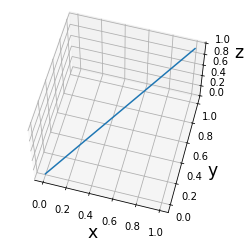

In [108]:
#  Example 3-d Plot
fig = plt.figure() # you can specify figsize as a kwarg here
ax = plt.gca(projection='3d')

# x, y, and z values of a position at the origin and a position at (1,1,1)
x_values = [0, 1]
y_values = [0, 1]
z_values = [0, 1]
ax.plot(x_values, y_values, z_values)

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(60,-75)


(10000, 3)


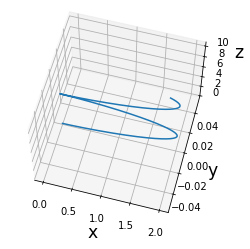

In [109]:
#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
### BEGIN SOLUTION
particle_positions = np.array(test_charged_particle.x_vals)
print(particle_positions.shape)                     
ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2])
### END SOLUTION

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(60,-75)
